In [ ]:
########################################################################################################
# This assignment was part of NAYA's college 'Practical Data Science course' (07-2023) I am attending
# Any use of this code or source files requires explicit approval from the owner of this account
######################################################################################################

# the code below loads diamonds features and prices and uses it to practice first model creation and
# use it to predict model's price
# the last piece of code (Q9) tests which feature combination create the best model

In [1]:
# !pip install scikit-learn

In [2]:
# General tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For validation
from sklearn.model_selection import train_test_split

# For curve fitting
from scipy.optimize import curve_fit

def csv_drive_path_generatoer(url:str):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path

In [3]:
path = csv_drive_path_generatoer(url = 'https://drive.google.com/file/d/1eqpYc1U1IrJDy5Qai-YJpSUueb8tbOl0/view?usp=sharing')

diamonds = pd.read_csv(filepath_or_buffer=path, index_col='#')
diamonds.head()

# some EDA
# omitting diamonds where the size of one of the dimensions is zero
diamonds = diamonds.loc[diamonds.x * diamonds.y * diamonds.z != 0]

# omitting non-round diamonds
diamonds = diamonds.loc[(diamonds.x - diamonds.y).abs() < 0.1]

# splitting the data to X (df containing the potential predicting features) 
# and y, a series containing real prices, which is the predicted variable here (diamonds price)
X = diamonds.drop(columns = 'price')
y = diamonds.price



In [4]:
# Your turn, Write your own algorithm!:
# *** First run it all with the simplest model you find, then make it more complex (adding features, complicated calculations etc' ... )
# 1. Implemnet logic for model training within the function "train_model"
# 2. Implement predict process  within the function "predict"
# 3. Split the data to train and test
# 4. Create model using the train set only
# 5. Generate prediction on the test sets only
# 6. Choos scoring/loss function and evaluate the results
# 7. Compare the results with the above notebook model
# 8. Plot your model (if possible), is it diffferent from the plot above ?
# 9. Try to improve your model.


In [5]:
# define rmsle model evaluation method
def rmsle(y_true: pd.Series, y_pred:pd.Series):
    return (((np.log1p(y_true)-np.log1p(y_pred))**2).mean())**0.5

In [6]:
# Q1 - Train model function
def train_model(X,y):
  model = y.groupby([X.carat]).mean().round(1)
  return model

model = train_model(X,y)

In [7]:
# Q2 - Implement predict process  within the function "predict"
def predict(model,X):
  y_pred = X.carat.map(model)
  return y_pred

y_pred = predict(model,X)

In [8]:
# Q3 - split the data to train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3,  random_state=142857)

In [9]:
# Q4 - Create model using the train dataset only
train_set_model = train_model(X_train,y_train)

In [10]:
# Q5 - Generate prediction on the test sets only

test_set_model = train_model(X_test,y_test)

# generate prediction using all data

all_model = train_model(X,y)

# generate prediction based on train data only
train_set_model = train_model(X_train,y_train)

# predict y based on all data
all_y_pred = X.carat.map(all_model)

# predict y based on train data
train_y_pred = X_train.carat.map(train_set_model)

# predict y based on test data
test_y_pred = X_test.carat.map(test_set_model)

In [11]:
# Q6 - Choose scoring/loss function and evaluate the results
# use rmsle to compare prediction's error/distance from real values

def rmsle(y_true: pd.Series, y_pred:pd.Series):
    return (((np.log1p(y_true)-np.log1p(y_pred))**2).mean())**0.5

# calc rmsle of prediction calculated based on all data
rmsle_all = rmsle(y,all_y_pred).round(6)

# calc rmsle of prediction calculated based on train data
rmsle_train = rmsle(y_train,train_y_pred).round(6)

# calc rmsle of prediction calculated based on test data
rmsle_test = rmsle(y_test,test_y_pred).round(6)

print(f'rmsle_all = {rmsle_all}, rmsle_train = {rmsle_train}, rmsle_test = {rmsle_test}')

rmsle_all = 0.248766, rmsle_train = 0.248024, rmsle_test = 0.248879


<Axes: xlabel='carat'>

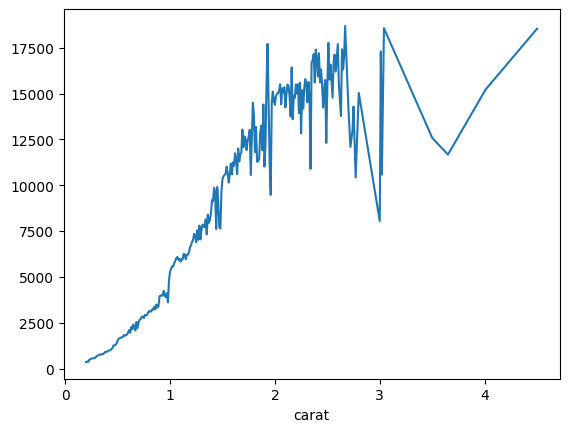

In [12]:
# Q8 - plot your model
train_set_model.plot()

In [13]:
# Q9 - improve your model
# This code iterates through list of diamonds features chosen (from total 1 to total 5 features)
# for each feature selection, it creates a groupby object and grouped by group number (series), 
# a model and a y (diamonds price) prediction
# the rmsle between actual and predicted prices is printed each iteration 
# to identify the best model and minimal rmsle;

def train_model2(X,y):
  X=X.join(y)
  model2 = X.groupby('group_name')[y.name].mean()
  return model2

def predict2(X,model2):
  y_pred2 = X.group_name.map(model2)
  return y_pred2

for i in range(1,len(X.columns[:5].values)+1):
  # itterate over tested feature combinations
  features = list(X.columns[:i].values)

  # create an X Series grouped by chosen features; each unique feature combination is group-numbered
  X['group_name'] = X.groupby(features).ngroup()

  # split the datasets to train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  # create a model per selected features using train data
  model2 = train_model2(X_train,y_train)

  # predict y (price) per X_test and model2
  y_pred2 = predict2(X_test, model2)

  # calc & print model's rmsle
  rmsle2 = rmsle(y_test,y_pred2)
  print(f"per test data, model's rmsle based on {features} is: {rmsle2.round(3)}")

per test data, model's rmsle based on ['carat'] is: 0.251
per test data, model's rmsle based on ['carat', 'cut'] is: 0.243
per test data, model's rmsle based on ['carat', 'cut', 'color'] is: 0.217
per test data, model's rmsle based on ['carat', 'cut', 'color', 'clarity'] is: 0.109
per test data, model's rmsle based on ['carat', 'cut', 'color', 'clarity', 'depth'] is: 0.14
